In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1470 non-null   int64  
 1   Attrition                1470 non-null   int64  
 2   BusinessTravel           1470 non-null   int64  
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   int64  
 5   DistanceFromHome         1470 non-null   int64  
 6   EducationField           1470 non-null   float64
 7   EnvironmentSatisfaction  1470 non-null   int64  
 8   JobInvolvement           1470 non-null   int64  
 9   JobLevel                 1470 non-null   int64  
 10  JobRole                  1470 non-null   int64  
 11  JobSatisfaction          1470 non-null   int64  
 12  MaritalStatus            1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   float64
 14  OverTime                

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                1470 non-null   int64  
 1   BusinessTravel           1470 non-null   int64  
 2   DailyRate                1470 non-null   int64  
 3   Department               1470 non-null   int64  
 4   DistanceFromHome         1470 non-null   int64  
 5   EducationField           1470 non-null   float64
 6   EnvironmentSatisfaction  1470 non-null   int64  
 7   JobInvolvement           1470 non-null   int64  
 8   JobLevel                 1470 non-null   int64  
 9   JobRole                  1470 non-null   int64  
 10  JobSatisfaction          1470 non-null   int64  
 11  MaritalStatus            1470 non-null   int64  
 12  MonthlyIncome            1470 non-null   float64
 13  OverTime                 1470 non-null   int64  
 14  StockOptionLevel        

In [5]:
x=df.drop(['Attrition'],axis=1)
y=df.Attrition

# standard scaling

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
model_params = {'criterion' : ['gini','entropy'],
                'max_depth': [1,2,3,4,5,6,7,8,9,None]}

In [11]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(dt,model_params,cv = 10)
search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]})

In [12]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [13]:
dtree2 = DecisionTreeClassifier(criterion= 'gini', max_depth = None)

In [14]:
model = dtree2.fit(x_train,y_train)

In [15]:
y_pred = model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [17]:
accuracy_score(y_pred,y_test)

0.8095238095238095

In [18]:
print(confusion_matrix(y_pred,y_test))

[[224  25]
 [ 31  14]]


In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       249
           1       0.36      0.31      0.33        45

    accuracy                           0.81       294
   macro avg       0.62      0.61      0.61       294
weighted avg       0.80      0.81      0.80       294



In [20]:
roc_auc_score(y_pred,y_test)

0.6053547523427042

In [21]:
y_pred_prob = model.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.6187028657616893

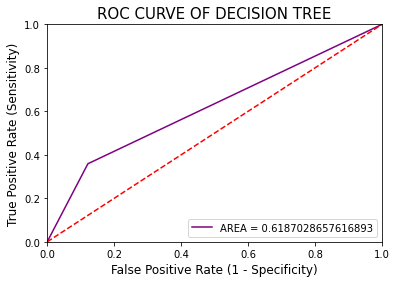

In [22]:
plt.plot(fpr,tpr,'purple',label = 'AREA = ' +str(roc_auc));
plt.legend(loc = 4);
plt.plot([0,1],[0,1],'--r');
plt.xlim([0,1]);
plt.ylim([0,1]);
plt.title('ROC CURVE OF DECISION TREE',size = 15);
plt.xlabel('False Positive Rate (1 - Specificity)',size = 12);
plt.ylabel('True Positive Rate (Sensitivity)',size = 12);